<h1>📘 House Price Prediction – Model Training & Evaluation</h1>

<hr>

<h2>🏠 Introduction</h2>
<p>
In this notebook, we build a <strong>House Price Prediction</strong> model using machine learning.
The goal is to estimate the price of a house based on features such as the number of bedrooms, bathrooms, square footage, and location.
</p>

<h2>📊 Dataset Overview</h2>
<p>The dataset contains information about properties including:</p>
<ul>
  <li>🛏️ Bedrooms</li>
  <li>🛁 Bathrooms</li>
  <li>📐 Square footage</li>
  <li>📍 Location</li>
  <li>💰 Price (Target variable)</li>
</ul>

<h2>🧹 Data Preprocessing</h2>
<p>Steps taken to clean and prepare the data:</p>
<ul>
  <li>Handled <strong>missing values</strong></li>
  <li>Removed <strong>duplicates</strong></li>
  <li>Converted categorical variables using <strong>one-hot encoding</strong> and <strong>label encoding</strong></li>
  <li>Scaled numerical features where required</li>
</ul>

<h2>⚙️ Model Training</h2>
<p>Trained multiple regression models using:</p>
<ul>
  <li>🔁 <strong>Train-Test Split</strong></li>
  <li>🔍 <strong>GridSearchCV</strong> for hyperparameter tuning</li>
</ul>

<p>Models evaluated:</p>
<ul>
  <li>📈 Linear Regression</li>
  <li>🧮 Lasso Regression</li>
  <li>🌳 Decision Tree Regressor</li>
</ul>

<h2>🏆 Model Evaluation</h2>
<p>Each model was evaluated using cross-validation. Metrics considered:</p>
<ul>
  <li>✅ <strong>R² Score</strong></li>
  <li>📉 <strong>Mean Squared Error (MSE)</strong></li>
  <li>📉 <strong>Root Mean Squared Error (RMSE)</strong></li>
</ul>

<p>Best model was selected based on:</p>
<ul>
  <li>Highest validation score</li>
  <li>Best generalization on test data</li>
</ul>

<h2>🧠 Conclusion</h2>
<p>
✅ Successfully built and evaluated a regression model for predicting house prices.<br>
🧠 Learned about:
</p>
<ul>
  <li>Model selection with <code>GridSearchCV</code></li>
  <li>Importance of feature preprocessing</li>
  <li>Comparing different algorithms using cross-validation</li>
</ul>




In [401]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20, 10)

<h2>📘 Data Aquisition</h2>

<hr>

In [402]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [403]:
df.shape

(13320, 9)

In [404]:
#checking null values 
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [405]:
df.groupby("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

<h2>🧹 Data Preprocessing</h2>

<hr>

In [406]:
df1=df.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df1
# Dropppig some extra columns which aren't usefull for training the model

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [407]:
#checking null values

df1.isna().sum() 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [408]:
# Dropping null values from the data set

df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [409]:
df2.shape

(13246, 5)

In [410]:
df2['size'].unique()   #-->it will give all unique values of size colunm

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [411]:
df2['bhk']= df2['size'].apply(lambda x: int(x.split(' ')[0]))

# Lambda is the predefined function of python, which allow user to write function in just single line 

C:\Users\HPENG\AppData\Local\Temp\ipykernel_18672\2823276466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']= df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [412]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [413]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [414]:
# Here we are checking the outliers that, which houses contains more than 20 bedrooms.

df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [415]:
df2.total_sqft.unique() 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [416]:
# This function will return all the sqft values which are float.

def is_float(x):
    try:
        float(x)
    except:
        return False 
    return True 

In [417]:
# (~) is the negation sign use to inverse the function's functionality

df2[~df2["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [418]:
# In this function we are taking the median of both values given into the DataFrame and conveet it into float.

import numpy as np

def convert_sqft_num(x):
    tokens=x.split('-')
    if len(tokens) == 2:
       return (float(tokens[0])+float(tokens[1]))/2 
    try:
        return float(x)
    except:
        return None

In [419]:
convert_sqft_num("44.4445-555.55")

299.99724999999995

In [420]:
convert_sqft_num("34.46Sq. Meter")

In [421]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_num)

In [422]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [423]:
# .loc will directly give us the row data which we are needed. 

df3.loc[90]

location      Sanjay nagar
size                 2 BHK
total_sqft          1000.0
bath                   2.0
price                 70.0
bhk                      2
Name: 90, dtype: object

<h2>🔍 Feature Engineering </h2>
<hr>

In [424]:
df3['size']=df3['size'].apply(lambda x: int(x.split()[0]))

In [425]:
df3['size'].dtype

dtype('int64')

In [426]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4
2,Uttarahalli,3,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3,1521.0,3.0,95.00,3
4,Kothanur,2,1200.0,2.0,51.00,2


In [470]:
# Just to convert the prices in lacs we multiply the price to 1000000 and divide it to total_sqft make a new column.

df4=df3.copy()
df4["price_per_sqft"]=df4["price"]*100000/df4["total_sqft"]
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,2,4250.000000


In [428]:
len(df4.location.unique())

1304

In [429]:
# Here we are checking the number of locations in our location column using groupby method.

df4.location= df4.location.apply(lambda x: x.strip()) 

location_stats=df4.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [430]:
len(location_stats[location_stats<=10])

1052

In [431]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [432]:
len(df4.location.unique())

1293

In [433]:
# Here we convert all the location as others which conatain less than or equal to 10 houses at that location.

df4.location= df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [434]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,2,4250.000000


<h2>📉 Outlier detection and removal </h2>

<hr>

In [435]:
df4.shape

(13246, 7)

In [436]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,85.0,8,6296.296296
70,other,3,500.0,3.0,100.0,3,20000.000000


In [437]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [438]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [439]:
def remove_pps_outlier(df):
    df_out= pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduce_df= subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out= pd.concat([df_out, reduce_df], ignore_index=True)
    return df_out


In [440]:
df5.shape


(12502, 7)

In [441]:
df6=remove_pps_outlier(df5)  # here we are calling the function we have made above 
df6.shape

(10241, 7)

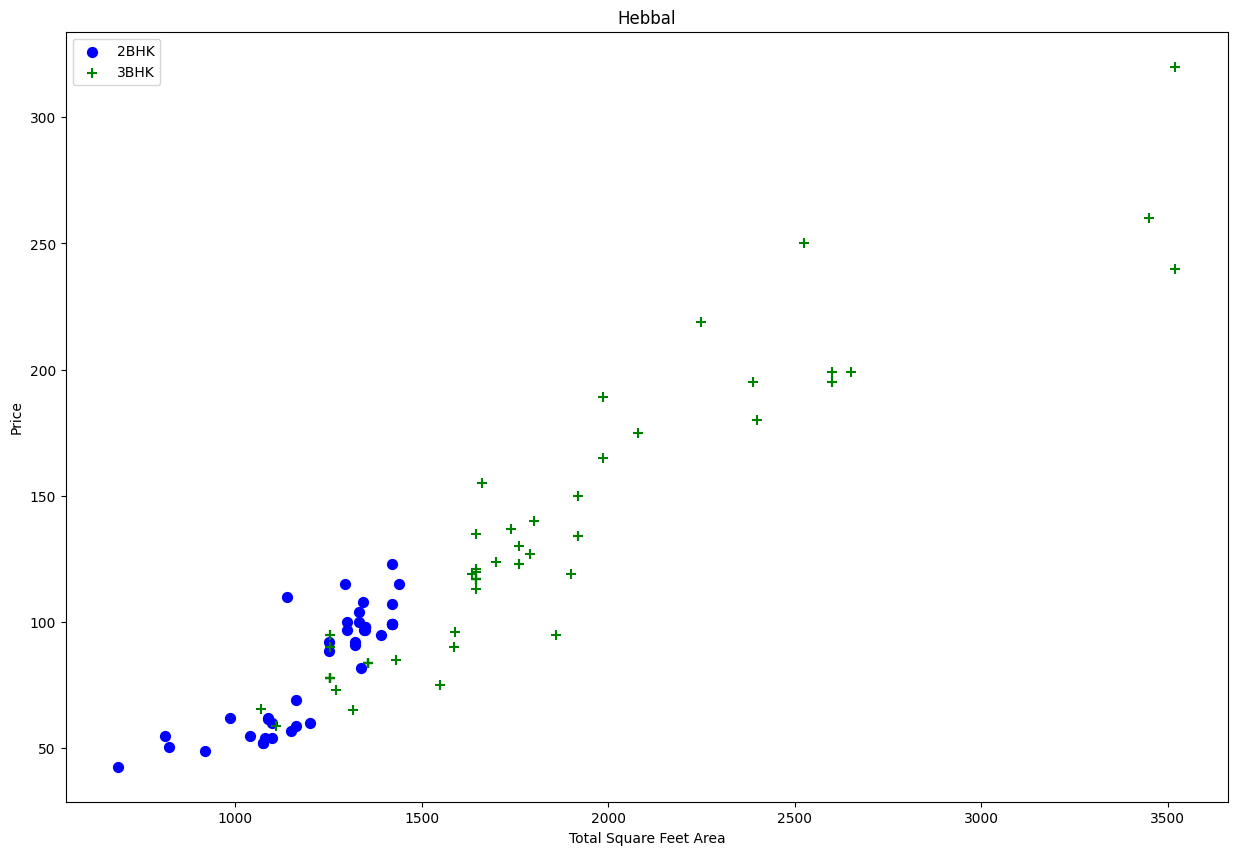

In [442]:
# making scatter plot for the visual representation of our data set.
def plot_scatter_chart(df,location):
    bhk2= df[(df.location==location) & (df.bhk==2)]
    bhk3= df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker="+", color='green', label="3BHK",s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df6,"Hebbal")

In [443]:
# We have seen above that 2 bhk houses are more expesive than the 3 bhk houses so,
# we have to remove some outliers from our data

In [444]:
def remove_bhk_outliers(df):
    exclude_indices= np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats= {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]= {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats= bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices= np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df7=remove_bhk_outliers(df6)
df7.shape

(7329, 7)

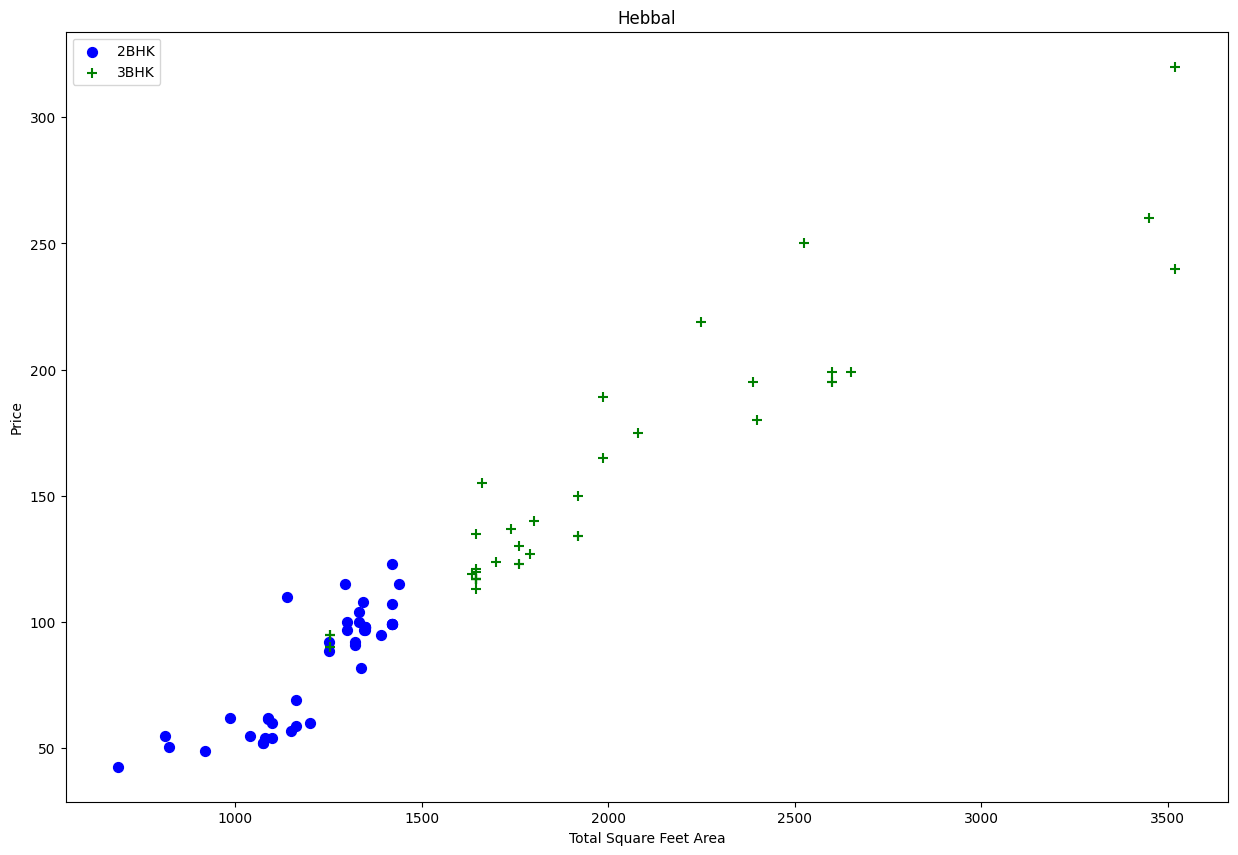

In [445]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

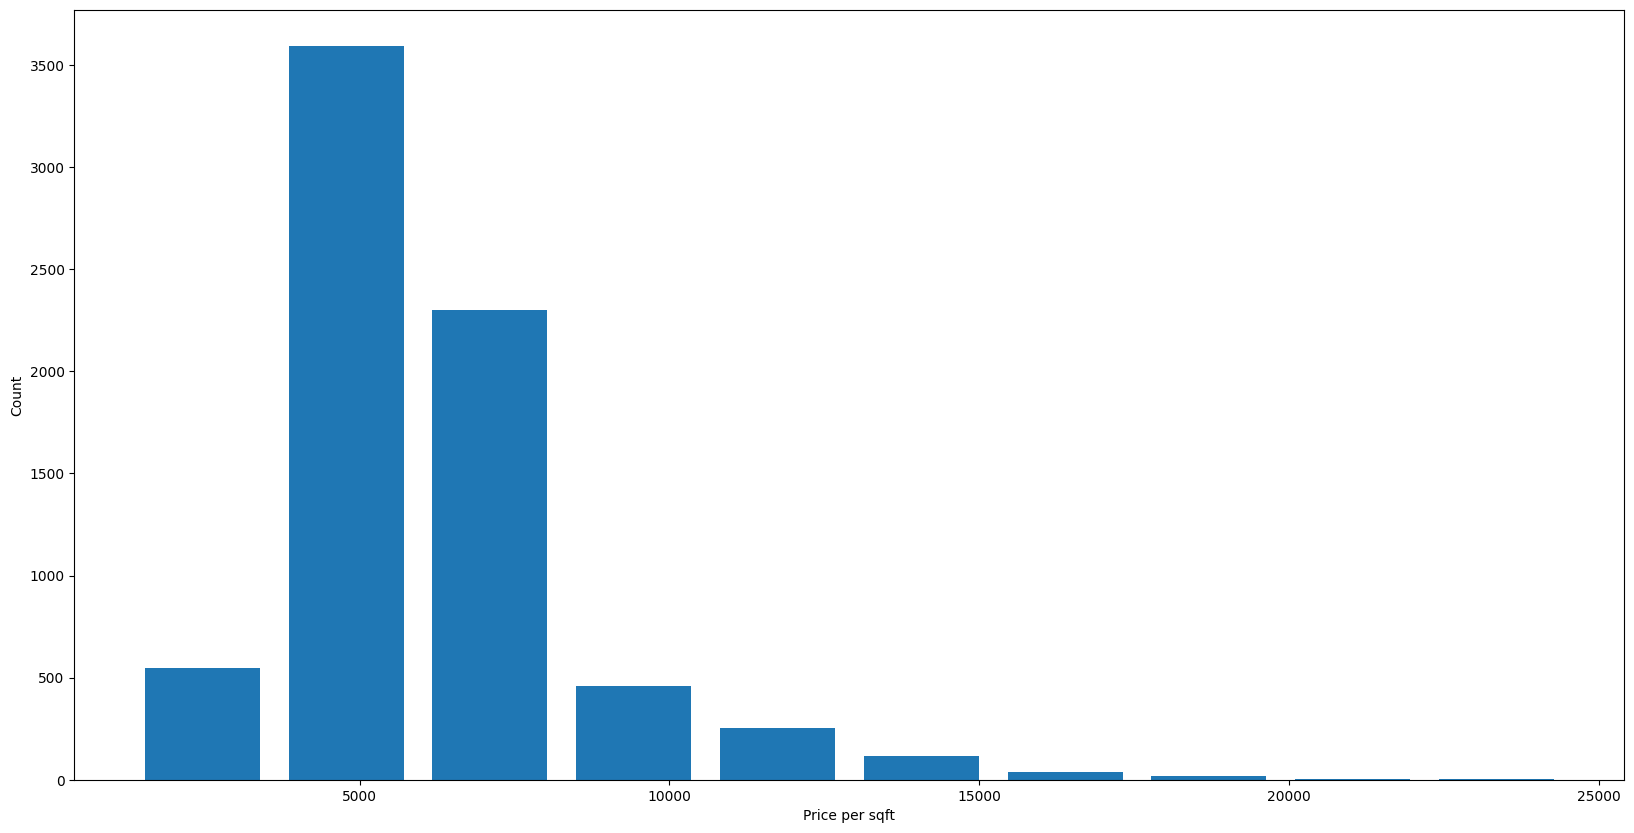

In [446]:
matplotlib.rcParams["figure.figsize"]=(20, 10)
plt.hist(df7.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [447]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [448]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10,4000.0,12.0,160.0,10,4000.000000
8486,other,10,12000.0,12.0,525.0,10,4375.000000
8575,other,16,10000.0,16.0,550.0,16,5500.000000
9308,other,11,6000.0,12.0,150.0,11,2500.000000
9639,other,13,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

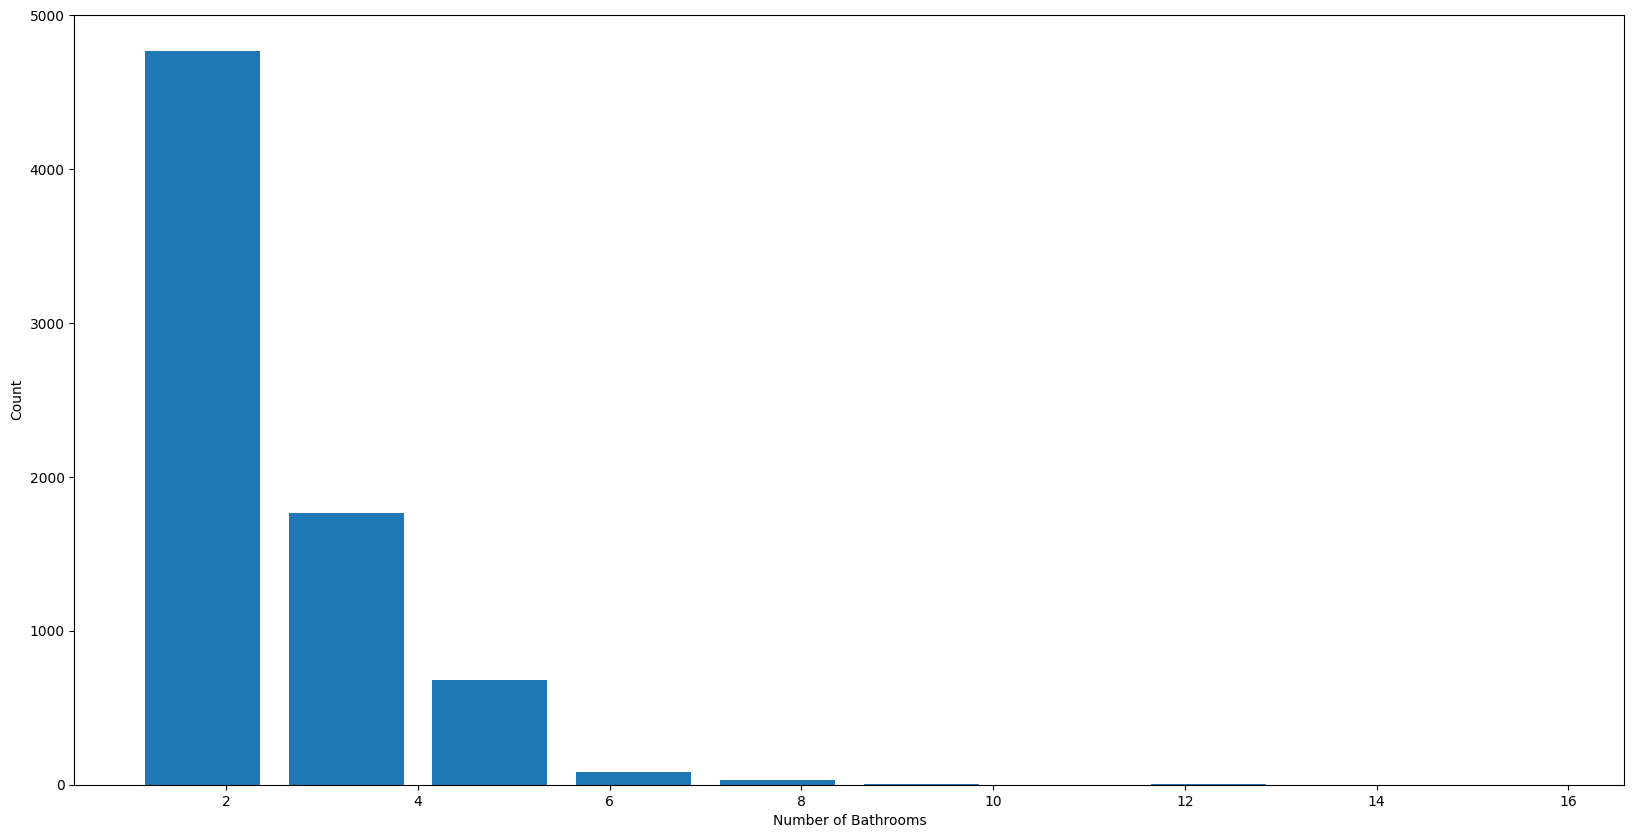

In [449]:
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [450]:
df7[df7.bath > df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3,1806.0,6.0,116.0,3,6423.034330
8411,other,6,11338.0,9.0,1000.0,6,8819.897689


In [451]:
df8=df7[df7.bath < df7.bhk+2]
df8.shape

(7251, 7)

In [452]:
df9=df8.drop(["size", "price_per_sqft"] , axis="columns" )
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


<h2>⚙️ Model Training</h2>

<hr>

In [453]:
dummies= pd.get_dummies(df9.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [454]:
df10= pd.concat([df9,dummies.drop("other", axis="columns")], axis="columns")
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [455]:
df11=df10.drop('location', axis='columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [456]:
df11.shape

(7251, 245)

X=df11.drop('price', axis='columns')
X.head()

In [457]:
Y=df11['price']
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [458]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [459]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

<h2>📊 Model Testing</h2>
<hr>

In [460]:
model.score(X_test, Y_test)

0.8452277697874349

In [461]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [462]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

# Function to find the best model using GridSearchCV for multiple algorithms
def find_best_model_using_GridSearchCV(X, Y):
    
    # Dictionary of models with their respective hyperparameters to tune
    algos = {
        "LinearRegression": {
            "model": LinearRegression(),
            "params": {
                "fit_intercept": [True, False],   # Whether to calculate the intercept
                "positive": [True, False]         # Restrict coefficients to be positive
            }
        },
        "Lasso": {
            "model": Lasso(),
            "params": {
                "alpha": [1, 2],                 # Regularization strength
                "selection": ['random', 'cyclic']  # Coordinate descent strategies
            }
        },
        "DecisionTree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ['squared_error', 'friedman_mse'],  # Functions to measure the quality of a split
                "splitter": ['best', 'random']                   # Strategy used to choose the split
            }
        }
    }

    # List to store results of each model after GridSearch
    scores = []

    # Cross-validation strategy: 5 different train/test splits
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Loop over each model and perform GridSearchCV
    for algo_name, config in algos.items():
        # GridSearchCV will search for the best combination of parameters
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)  # Fit the model on training data

        # Append model results to the scores list
        scores.append({
            "model": algo_name,
            "best_Score": gs.best_score_,         # Best cross-validation score
            "best_params": gs.best_params_        # Best parameters for the model
        })

    # Return the results as a DataFrame for better visualization
    return pd.DataFrame(scores, columns=['model', 'best_Score', 'best_params'])

# Call the function with your features (X) and target (Y)
find_best_model_using_GridSearchCV(X, Y)


,model,best_Score,best_params
0,LinearRegression,0.819001,"{'fit_intercept': False, 'positive': False}"
1,Lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,DecisionTree,0.723464,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [463]:
X.columns  # here we are checking the column names 

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [464]:
def predict_price(location, sqft, bath, bhk):
    # Find the index of the location column in the feature set
    loc_index = np.where(X.columns == location)[0][0]

    # Create a zero vector with the same number of features as in training data
    x = np.zeros(len(X.columns))

    # Set values for the numeric features: sqft, bath, and bhk
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    # Set the corresponding location column to 1 (one-hot encoding)
    if loc_index >= 0:
        x[loc_index] = 1

    # Return the predicted price from the trained model
    return model.predict([x])[0]


In [465]:
# It will predict the house prices using some parmetres.

predict_price("1st Phase JP Nagar", 1000, 2, 2)

D:\ml projects\HousePricePrediction\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.499046771943)

In [466]:
predict_price("1st Phase JP Nagar", 1000, 4, 3)

D:\ml projects\HousePricePrediction\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(91.8842188967183)

In [467]:
predict_price("Vijayanagar", 1200, 3, 1)

D:\ml projects\HousePricePrediction\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(85.0320712394421)

<h2>Saving Model into Pickle File</h2>

In [468]:
import pickle
with open ('HousePricePrediction.pickle', 'wb')as f:
    pickle.dump(model, f)

In [469]:
import json
columns={
    "data_columns":[col.lower() for col in X.columns]
}
with open("column.json", "w") as f :
     json.dump(columns)